In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

from fytok.modules.equilibrium import Equilibrium
from spdm.core.file import File
from spdm.core.function import Function
from spdm.view import sp_view

WORKSPACE = "/home/salmon/workspace"  # "/ssd01/salmon_work/workspace/"
output_path = pathlib.Path(f"{WORKSPACE}/output/")

2024-05-31 10:20:40,023 [   fytok]     INFO: Failed to import IMAS wrapper. Using dummy ontology as fallback.
2024-05-31 10:20:40,319 [   fytok]     INFO: 
###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU @ Institute of Plasma Physics Chinese Academy of Sciences 
            
 version = 0.4.1  (spdm=beta extension=0.2.3.dev0+g2cc21ff.d20240223)

 Run by salmon at 2024-05-31T10:20:40.023377.
 Job ID: fytok_salmon_surface_30350

###################################################################################################



In [2]:
data_path = pathlib.Path("/home/salmon/workspace/fytok_data/data/15MA inductive - burn")
astra_profiles = pd.read_excel(
    next(data_path.glob("*ASTRA.xls")).absolute().as_posix(), sheet_name=1, header=10, usecols="B:BN"
)
eqdsk_file = File(f"file+geqdsk://{next(data_path.glob('**/g*.txt')).absolute().as_posix()}", format="GEQdsk").read()

equilibrium = Equilibrium(
    f"file+geqdsk://{next(data_path.glob('**/g*.txt')).absolute().as_posix()}#equilibrium",
    # code={"parameters": {"psi_norm": np.linspace(0.01, 0.999, 128)}},
)

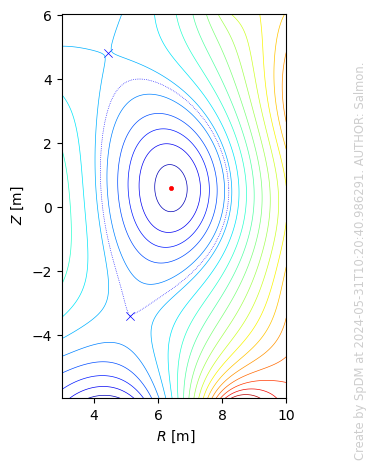

In [3]:
fig=sp_view.display(equilibrium)

In [4]:
eq=equilibrium.time_slice.current
eq_profiles_2d = eq.profiles_2d
eq_profiles_1d = eq.profiles_1d


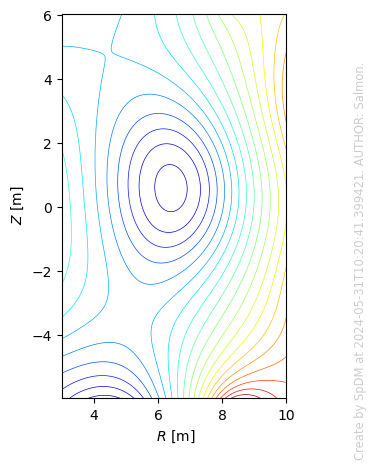

In [5]:
fig = sp_view.display(eq_profiles_2d.psi)

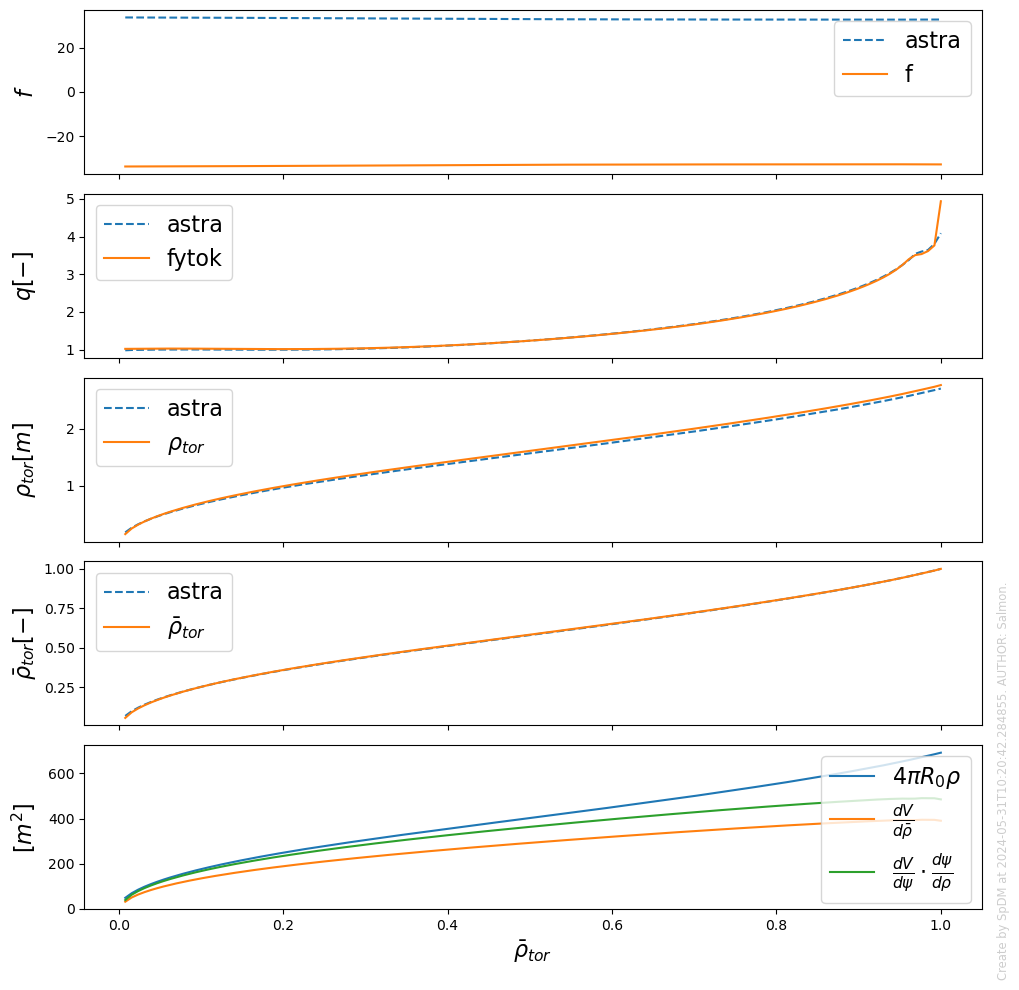

In [6]:
R0 = equilibrium.time_slice.current.vacuum_toroidal_field.r0
psi_axis = equilibrium.time_slice.current.global_quantities.psi_axis
psi_boundary = equilibrium.time_slice.current.global_quantities.psi_boundary
eq_profiles_1d = equilibrium.time_slice.current.profiles_1d

fig = sp_view.plot(
    eq_profiles_1d.psi_norm[1:],
    (
        [
            (
                Function(
                    eqdsk_file.get("equilibrium/time_slice/0/profiles_1d/psi_norm"),
                    -eqdsk_file.get("equilibrium/time_slice/0/profiles_1d/f"),
                ),
                {"label": r"astra", "$matplotlib": {"linestyle": "dashed"}},
            ),
            (eq_profiles_1d.f, "f"),
        ],
        {"y_label": r"$f$"},
    ),
    (
        [
            (
                Function(astra_profiles["xq"].values, astra_profiles["q"].values)(eq_profiles_1d.rho_tor_norm),
                {"label": r"astra", "$matplotlib": {"linestyle": "dashed"}},
            ),
            (eq_profiles_1d.q, {"label": r"fytok"}),
        ],
        {"y_label": r"$q [-]$"},
    ),
    (
        [
            (
                Function(astra_profiles["Fp"].values, astra_profiles["rho"].values),
                {"label": r"astra", "$matplotlib": {"linestyle": "dashed"}},
            ),
            (eq_profiles_1d.rho_tor),
        ],
        {
            "y_label": r"$\rho_{tor}[m]$",
        },
    ),
    (
        [
            (
                Function(astra_profiles["Fp"].values, astra_profiles["x"].values),
                {"label": r"astra", "$matplotlib": {"linestyle": "dashed"}},
            ),
            (eq_profiles_1d.rho_tor_norm),
        ],
        {
            "y_label": r"$\bar{\rho}_{tor}[-]$",
        },
    ),
    (
        [
            Function(
                astra_profiles["Fp"].values,
                4 * (scipy.constants.pi**2) * R0 * astra_profiles["rho"].values,
                label=r"$4\pi R_0 \rho$",
            ),
            (eq_profiles_1d.dvolume_drho_tor, {"label": r"$\frac{dV}{d\bar{\rho}}$"}),
            (
                (scipy.constants.pi * 2.0) * eq_profiles_1d.dvolume_dpsi * eq_profiles_1d.dpsi_drho_tor,
                r"$\frac{dV}{d\psi} \cdot \frac{d\psi}{d\rho}$",
            ),
        ],
        {"y_label": r"$[m^2]$"},
    ),
    x_label=r"$\bar{\rho}_{tor}$",
)

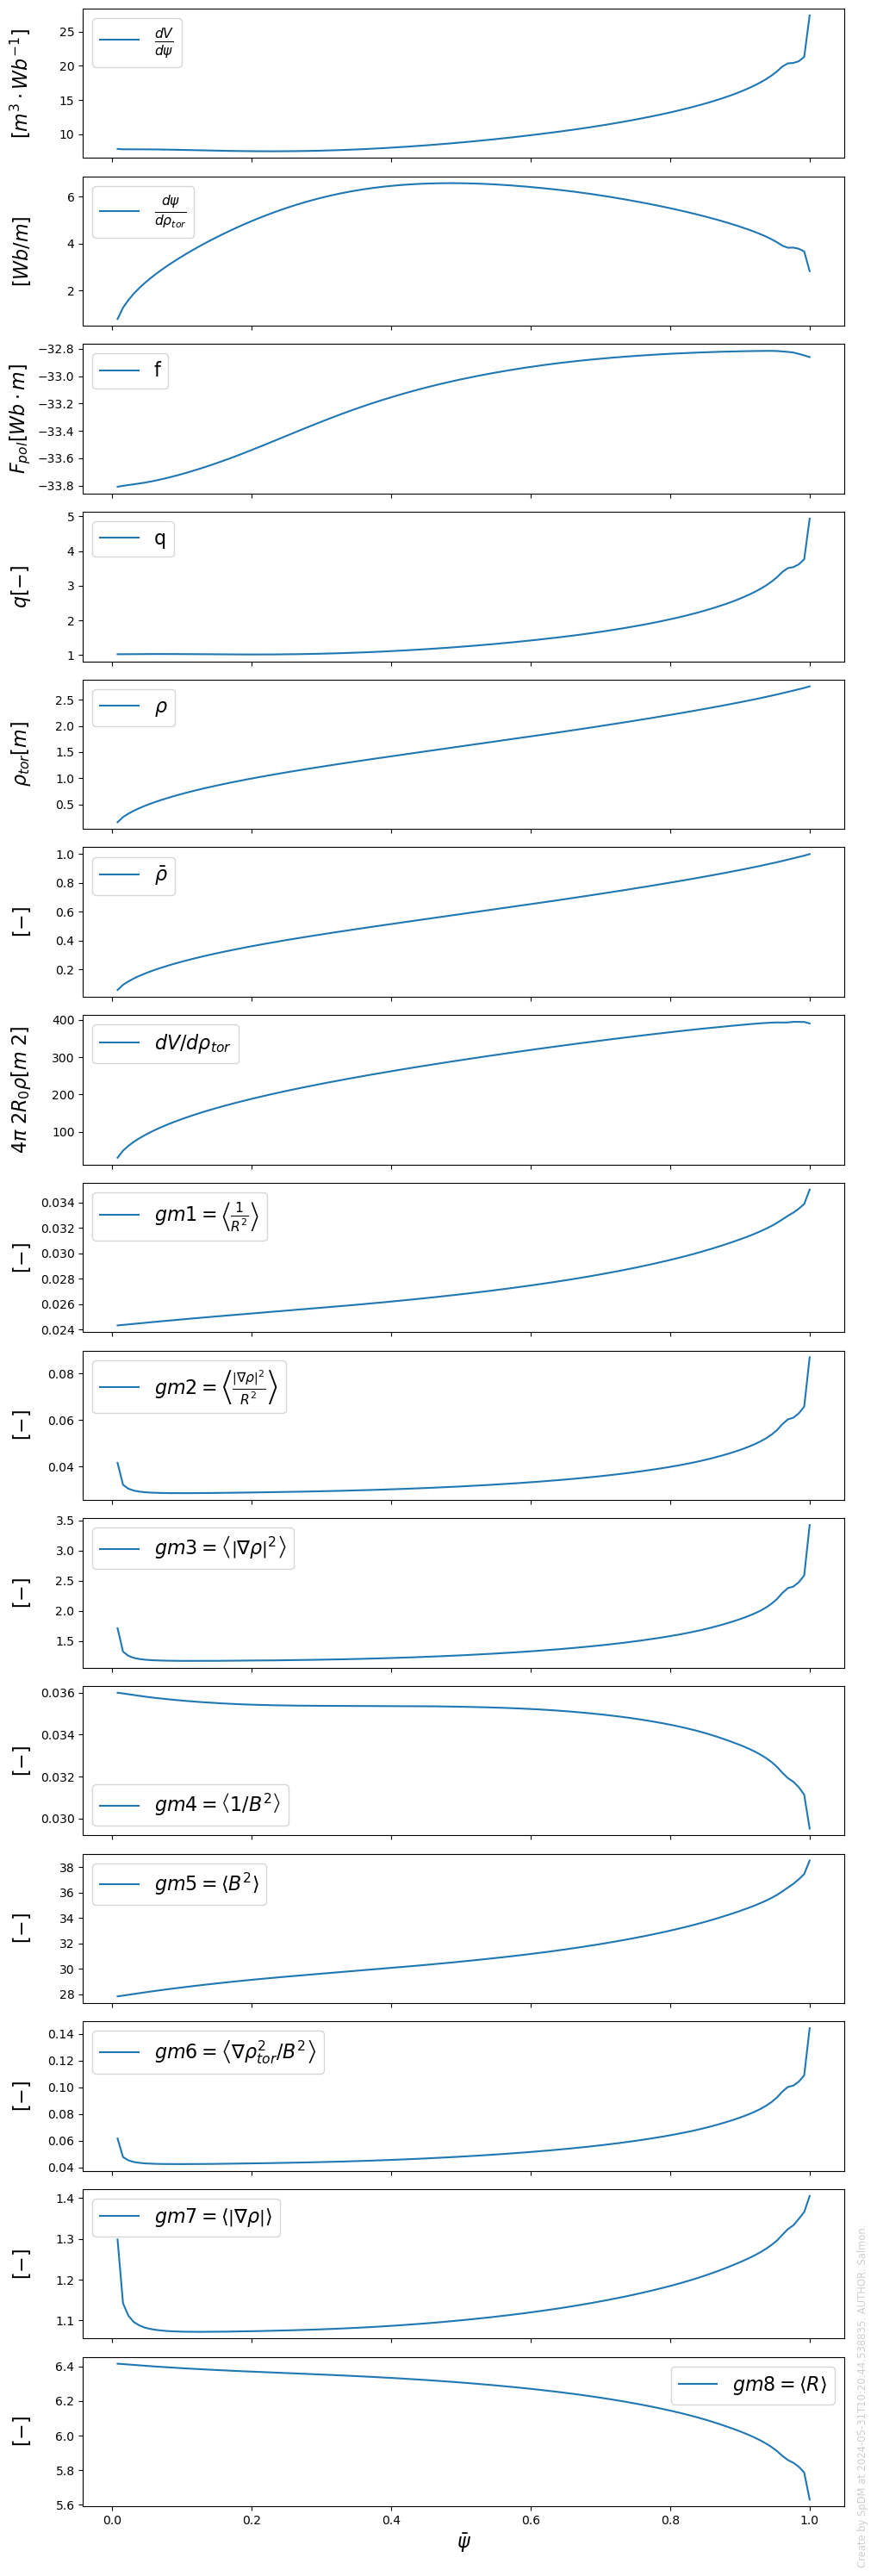

In [7]:
eq_profiles_1d = equilibrium.time_slice.current.profiles_1d
fig = sp_view.plot(  # plot tokamak geometric profile
    eq_profiles_1d.grid.psi_norm[1:],
    (eq_profiles_1d.dvolume_dpsi, r"$\frac{dV}{d\psi}$"),
    (eq_profiles_1d.dpsi_drho_tor, r"$\frac{d\psi}{d\rho_{tor}}$"),
    (eq_profiles_1d.f, {"y_label": r"$F_{pol} [Wb\cdot m]$"}),
    (eq_profiles_1d.q, {"y_label": r"$q [-]$"}),
    ((eq_profiles_1d.rho_tor, r"$\rho$"), {"y_label": r"$\rho_{tor}[m]$"}),
    ((eq_profiles_1d.rho_tor_norm, r"$\bar{\rho}$"), {"y_label": r"[-]"}),
    ((eq_profiles_1d.dvolume_drho_tor, r"$dV/d\rho_{tor}$"), {"y_label": r"$4\pi ^ 2 R_0 \rho[m ^ 2]$"}),
    (eq_profiles_1d.gm1, r"$gm1=\left<\frac{1}{R^2}\right>$"),
    (eq_profiles_1d.gm2, r"$gm2=\left<\frac{\left|\nabla \rho\right|^2}{R^2}\right>$"),
    (eq_profiles_1d.gm3, r"$gm3=\left<\left|\nabla \rho\right|^2\right>$"),
    (eq_profiles_1d.gm4, r"$gm4=\left<1/B^2\right>$"),
    (eq_profiles_1d.gm5, r"$gm5=\left<B^2\right>$"),
    (eq_profiles_1d.gm6, r"$gm6=\left<\nabla \rho_{tor}^2/ B^2 \right>$"),
    (eq_profiles_1d.gm7, r"$gm7=\left<\left|\nabla \rho\right|\right>$"),
    (eq_profiles_1d.gm8, r"$gm8=\left<R\right>$"),
    x_label=r"\bar{\psi}",
)